In [59]:
# you don't need that if you are not using Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# you don't need that if you are not using Colab
!ls "/content/drive/MyDrive/UCSB_data/NMR/SP"

NMR.ipynb  SP_Pristine.txt


In [3]:
import matplotlib.pyplot as plt
import csv
import math
import numpy as np
import re


In [53]:
#function to extract NMR two column file

def readNMR_topspin(file_path):
  import numpy as np
  import re
  with open(file_path, 'r') as file:
    file_contents = file.read()

  
  #locate line 4 for x-value at two ends

  target_line_number = 3  # Assuming the line number is 3 (0-based index)
  lines = file_contents.split('\n')
  target_line = lines[target_line_number]

  # extract x-values at two ends
  pattern = r'[-+]?\d+\.\d+'  # Matches one or more digits
  matched_numbers = re.findall(pattern, target_line)

  numbers = [float(num) for num in matched_numbers]

  shift_start=numbers[0]
  shift_end=numbers[1]


  # extract the data points

  target_line_number2 = 5  # Assuming the line number is 3 (0-based index)
  target_line2 = lines[target_line_number2]

  # extract x-values at two ends
  pattern2 = r'\d+'  # Matches one or more digits
  matched_numbers2 = re.findall(pattern2, target_line2)

  numbers2 =int(matched_numbers2[0])

  # creat x -value

  px=np.linspace(shift_start,shift_end, num = numbers2)

  # y value
  py=np.loadtxt(file_path,skiprows=10,unpack=True,delimiter=' ')

  return px, py

In [54]:
# read your file
p1,p2=readNMR_topspin("/content/drive/MyDrive/UCSB_data/NMR/SP/SP_Pristine.txt")

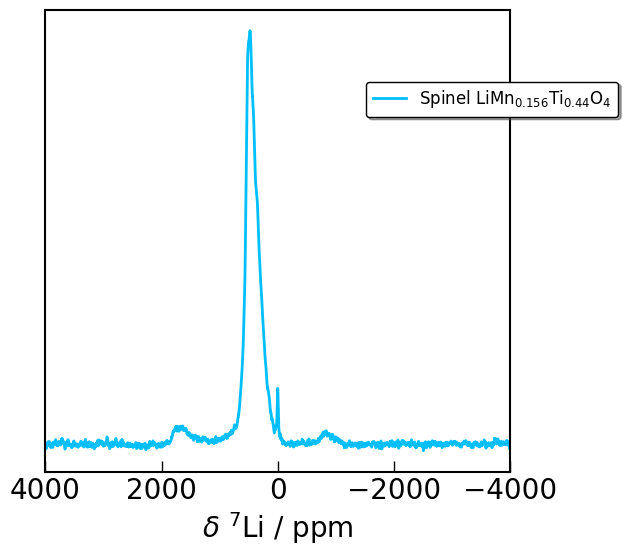

In [58]:
#plot
plt.subplots(figsize=(6,6))

plt.plot(p1,p2,linewidth=2, color='deepskyblue',label=r'Spinel LiMn$_{0.156}$Ti$_{0.44}$O$_{4}$')

#plt.ylim(-0.1,0.6)
plt.xlim(4000,-4000)
plt.rcParams['axes.linewidth'] = 1.5
plt.rc('xtick', labelsize=18)
#plt.ylabel('Intensity (arb. unit)',fontsize=22)
plt.xlabel(r'$\delta$ $^{7}$Li / ppm',fontsize=20) 
plt.yticks([])

plt.rcParams['axes.spines.left']=True
plt.rcParams['axes.spines.right']=True
plt.rcParams['axes.spines.top']=True
plt.rc('xtick', labelsize=20,direction="in") 
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.legend(frameon=True, fontsize = 12, loc=4, edgecolor="black",shadow=True, ncol=1,bbox_to_anchor=(1.25, 0.75))
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#plt.savefig('/content/drive/MyDrive/UCSB_data/NMR/compare.png')

In [60]:
#Save the data into two coulum file if you need to plot them in other software 
data = np.column_stack((p1, p2))
np.savetxt('/content/drive/MyDrive/UCSB_data/NMR/SP/SP_Pristine_xy.txt', data, fmt='%d', delimiter='\t')